<a href="https://colab.research.google.com/github/jmatt724/Assignment4_JLM/blob/main/Assignment4_JLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Live.csv')

In [ ]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
dataset = dataset.filter(['num_likes', 'num_reactions'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_likes      7050 non-null   int64
 1   num_reactions  7050 non-null   int64
dtypes: int64(2)
memory usage: 110.3 KB


# KMeans

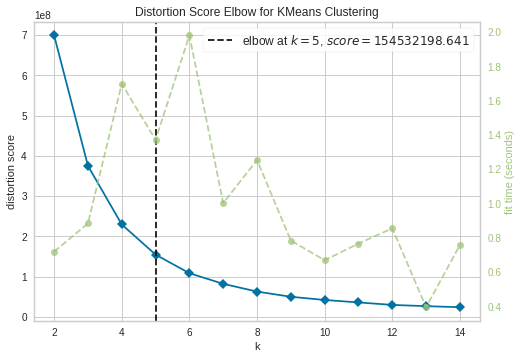

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans (random_state = 0)
visualizer = KElbowVisualizer(km, k=(2,15))
visualizer.fit(dataset)
visualizer.show()

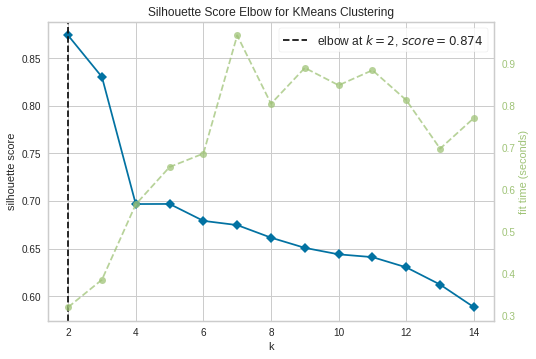

In [ ]:
km = KMeans(random_state = 0)

visualizer = KElbowVisualizer(km, k = (2,15), metric = 'silhouette')
visualizer.fit(dataset)
visualizer.show()

## K value is 2

In [ ]:
km = KMeans(n_clusters = 2, random_state = 0)

In [ ]:
y_pred = km.fit_predict(dataset)
dataset['cluster'] = y_pred

In [ ]:
km.cluster_centers_

array([[ 107.41486115,  118.79188282],
       [1637.21169355, 1701.13709677]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


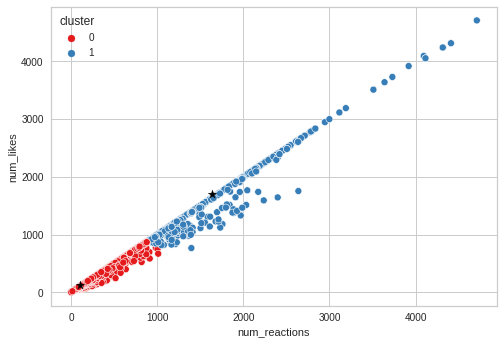

In [ ]:
sns.scatterplot('num_reactions', 'num_likes', data=dataset,
                hue = dataset['cluster'],
                palette = 'Set1',
                legend = 'full')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            marker='*', s = 80, c ='black')

## drop the cluster column

In [ ]:
dataset = dataset.drop('cluster', axis = 1)

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=50, min_samples= 2).fit(dataset)
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
dataset.columns

Index(['num_likes', 'num_reactions'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


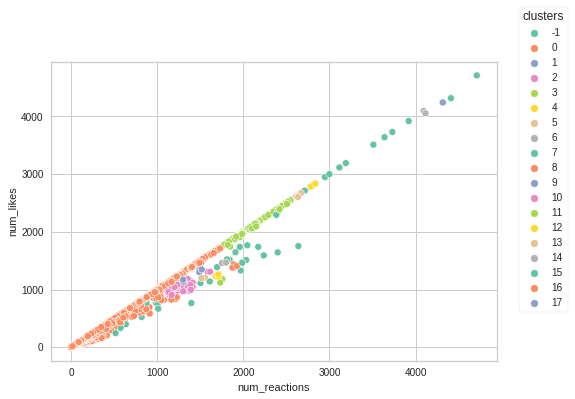

In [ ]:
p = sns.scatterplot('num_reactions', 'num_likes', data=dataset,
                    hue = cluster.labels_,
                    legend='full',
                    palette = 'Set2',)
sns.move_legend(p, 'upper right', bbox_to_anchor=(1.17, 1.2), title ='clusters')